In [71]:
import matplotlib.pylab as plt

In [26]:
txt_test = """.|...\....
|.-.\.....
.....|-...
........|.
..........
.........\\
..../.\\\\..
.-.-/..|..
.|....-|.\\
..//.|...."""

In [108]:
with open("input/16", "r") as fp:
    txt = fp.read()[:-1]

In [5]:
def process_puzzle(ttt):
    lines = ttt.split("\n")
    dic = {".": 0, "\\": 1, "/": 2, "|": -1, "-": -2}
    
    return np.array(list(map(lambda row: 
                    list(map(lambda x: dic[x], row))
                    ,lines)))

In [141]:
def make_beams(mapping, vlim=40):
    n0, n1 = mapping.shape
    
    Z = np.zeros((n0, n1))
    D = np.zeros((n0, n1, 4))
    
    dic_move = {"R": (0, 1), "L": (0, -1), "U": (-1, 0), "D": (1, 0)}
    
    dic_letter = {"R": 0, "L": 1, "U": 2, "D": 3}
    
    dic_1 = {"R": "D", "L": "U", "U": "L", "D": "R"} # \
    dic_2 = {"R": "U", "L": "D", "U": "R", "D": "L"} # /
    
    
    lst = [(1, 0, "R")]
    
    
    
    while len(lst) != 0:
        i, j, d = lst.pop(0)
        
        Z[i, j] = 1
        
        """
        if Z[i, j] > vlim:
            continue
        """
        
        # Stop condition
        vi = dic_letter[d]
        if D[i, j, vi] > 10:
            continue
            
        else:
            D[i, j, vi] += 1
             
        
        
        # Update position
        a, b = dic_move[d]
        i, j = i+a, j+b
            
        if (i < 0) | (i == n0) | (j < 0) | (j == n1):
            # Out of bound
            continue
            
        v = mapping[i, j]
        if v == 0: # .
            lst.append((i, j, d))
            
        elif v == 1: #\\
            lst.append((i, j, dic_1[d]))
        
        elif v == 2: # /
            lst.append((i, j, dic_2[d]))
        
        elif ((v == -1) & (d in "UD")) | ((v == -2) & (d in "RL")):
            # No change # -1=|, -2: -
            lst.append((i, j, d))
        
        elif (v == -2) & (d in "UD"): # -
            # Split
            lst.append((i, j, 'R'))
            lst.append((i, j, 'L'))
            
        elif (v == -1) & (d in "RL"): # |
            # Split
            lst.append((i, j, 'U'))
            lst.append((i, j, 'D'))
    
        
    return Z
        


In [148]:
my_map = process_puzzle(txt)

# Add borders
n0, n1 = my_map.shape
M1 = np.zeros((n0+2, n1+2))
M1[1:n0+1, 1:n1+1] = my_map

print(my_map.shape)
Z = make_beams(M1, 2)

tot = (Z[1:n0+1,1:n1+1] > 0).sum()

print("Part 1: {}".format(tot))

(110, 110)


In [ ]:
# 7759: Too low
# 7928 too low

# Part 2

In [158]:
def make_beams_v2(mapping, start=(1, 0, "R"), vlim=2):
    n0, n1 = mapping.shape
    
    Z = np.zeros((n0, n1))
    D = np.zeros((n0, n1, 4))
    
    dic_move = {"R": (0, 1), "L": (0, -1), "U": (-1, 0), "D": (1, 0)}
    
    dic_letter = {"R": 0, "L": 1, "U": 2, "D": 3}
    
    dic_1 = {"R": "D", "L": "U", "U": "L", "D": "R"} # \
    dic_2 = {"R": "U", "L": "D", "U": "R", "D": "L"} # /
    
    
    lst = [start]
    
    
    
    while len(lst) != 0:
        i, j, d = lst.pop(0)
        
        Z[i, j] = 1

        # Stop condition
        vi = dic_letter[d]
        if D[i, j, vi] > vlim:
            continue
            
        else:
            D[i, j, vi] += 1
             
        
        
        # Update position
        a, b = dic_move[d]
        i, j = i+a, j+b
            
        if (i < 0) | (i == n0) | (j < 0) | (j == n1):
            # Out of bound
            continue
            
        v = mapping[i, j]
        if v == 0: # .
            lst.append((i, j, d))
            
        elif v == 1: #\\
            lst.append((i, j, dic_1[d]))
        
        elif v == 2: # /
            lst.append((i, j, dic_2[d]))
        
        elif ((v == -1) & (d in "UD")) | ((v == -2) & (d in "RL")):
            # No change # -1=|, -2: -
            lst.append((i, j, d))
        
        elif (v == -2) & (d in "UD"): # -
            # Split
            lst.append((i, j, 'R'))
            lst.append((i, j, 'L'))
            
        elif (v == -1) & (d in "RL"): # |
            # Split
            lst.append((i, j, 'U'))
            lst.append((i, j, 'D'))
    
        
    return Z
        


In [168]:
my_map = process_puzzle(txt_test)

# Add borders
n0, n1 = my_map.shape
M1 = np.zeros((n0+2, n1+2))
M1[1:n0+1, 1:n1+1] = my_map

L = 2
print(my_map.shape)
best = 0
for i in range(n0):
    Z = make_beams_v2(M1, start=(i+1, 0, "R"), vlim=L)
    tot = (Z[1:n0+1,1:n1+1] > 0).sum()
    best = max(tot, best)
    
    Z = make_beams_v2(M1, start=(i+1, n1+1, "L"), vlim=L)
    tot = (Z[1:n0+1,1:n1+1] > 0).sum()
    best = max(tot, best)
    

for i in range(n1):
    Z = make_beams_v2(M1, start=(0, i+1, "D"), vlim=L)
    tot = (Z[1:n0+1,1:n1+1] > 0).sum()
    best = max(tot, best)
    
    Z = make_beams_v2(M1, start=(n0+1, i+1, "U"), vlim=L)
    tot = (Z[1:n0+1,1:n1+1] > 0).sum()
    best = max(tot, best)
    
print("Part 2: {}".format(best))

(10, 10)
0
1
2
3
4
5
6
7
8
9

Part 2: 51


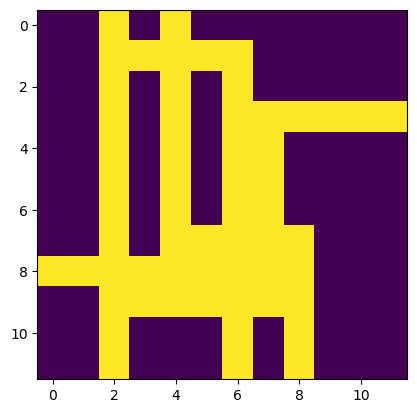

In [157]:
plt.imshow(Z)